In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.reshape(X_train, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))

X_train, X_test = X_train/255, X_test/255

In [10]:
from tensorflow.keras.layers import Layer, Input, Dense 
from tensorflow.keras.models import Model

inputs = Input(shape=(784,))
encoded = Dense(256, activation='relu')(inputs)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

encoder = Model(inputs=inputs, outputs=encoded)
autoencoder = Model(inputs=inputs, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 128)               8320

In [11]:
autoencoder.fit(X_train, X_train, 
                epochs=100, batch_size=512, 
                shuffle=True)

Epoch 1/300
  1/118 [..............................] - ETA: 36s - loss: 0.6928

2022-11-04 15:35:33.187282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 1s 9ms/step - loss: 0.2880
Epoch 2/300
118/118 [==============================] - 1s 9ms/step - loss: 0.1838
Epoch 3/300
118/118 [==============================] - 1s 9ms/step - loss: 0.1493
Epoch 4/300
118/118 [==============================] - 1s 8ms/step - loss: 0.1361
Epoch 5/300
118/118 [==============================] - 1s 8ms/step - loss: 0.1280
Epoch 6/300
118/118 [==============================] - 1s 8ms/step - loss: 0.1225
Epoch 7/300
118/118 [==============================] - 1s 9ms/step - loss: 0.1188
Epoch 8/300
118/118 [==============================] - 1s 9ms/step - loss: 0.1157
Epoch 9/300
118/118 [==============================] - 1s 9ms/step - loss: 0.1131
Epoch 10/300
118/118 [==============================] - 1s 8ms/step - loss: 0.1110
Epoch 11/300
118/118 [==============================] - 1s 8ms/step - loss: 0.1090
Epoch 12/300
118/118 [==============================] - 1s 8ms/step - loss: 0.1074
Epoch 13/300
118/118 [===

In [12]:
X1 = X_test[0:1, :]
Z1 = encoder.predict(X1)
R1 = autoencoder.predict(X1)

X2 = X_test[1:2, :]
Z2 = encoder.predict(X2)
R2 = autoencoder.predict(X2)

1/1 [==============================] - 0s 11ms/step


2022-11-04 15:40:44.378509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-04 15:40:44.433174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


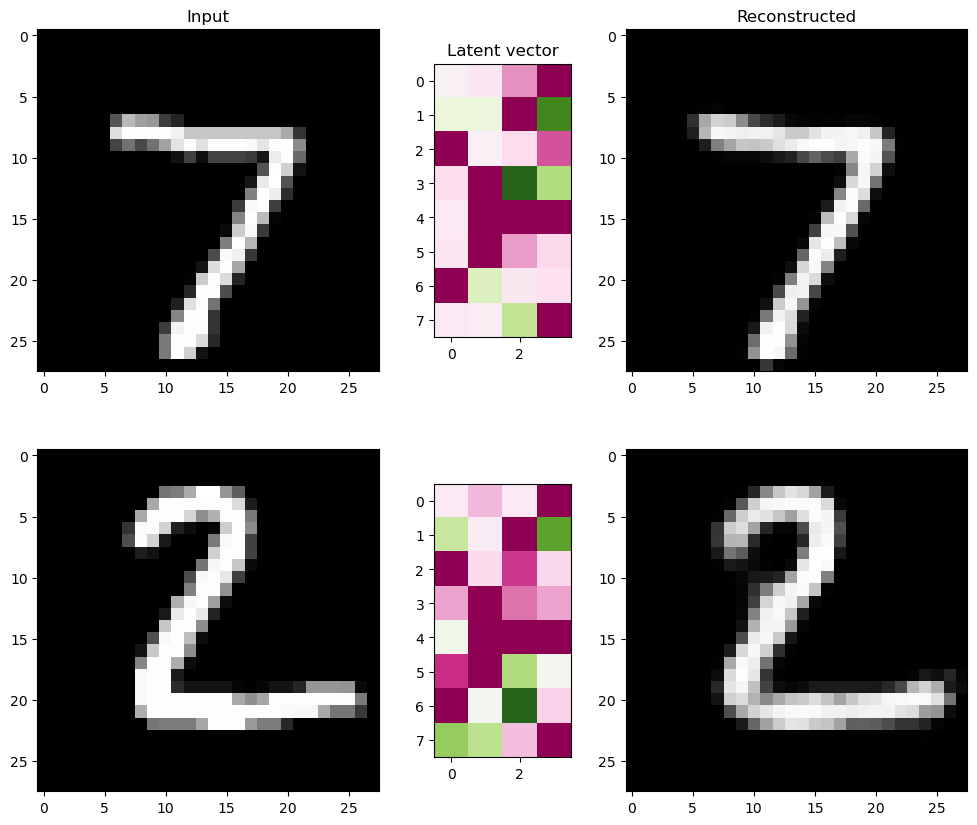

In [13]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 10), width_ratios=(5,2,5))
ax[0, 0].imshow(X1.reshape((28, 28)), cmap='gray')
ax[0, 1].imshow(Z1.reshape((8, 4)), cmap='PiYG')
ax[0, 2].imshow(R1.reshape((28, 28)), cmap='gray')
ax[1, 0].imshow(X2.reshape((28, 28)), cmap='gray')
ax[1, 1].imshow(Z2.reshape((8, 4)), cmap='PiYG')
ax[1, 2].imshow(R2.reshape((28, 28)), cmap='gray')

ax[0, 0].set_title('Input')
ax[0, 1].set_title('Latent vector')
ax[0, 2].set_title('Reconstructed')

# plt.show()
plt.savefig("fc_autoencoder_mnist.pdf", bbox_inches='tight')